# Inventory Management --- ABC Analysis

This project is to distinguish the products in stock and focus on managing them based on their worth. The main objective of the project is to make maximum out of minimum investment without wasting any resources or inventory.

## 1. Data loading and Preprocessing

### 1.1 data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Sales.csv')

In [3]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


### 1.2 data preprocessing

In [4]:
# take a subset of the data
df_sub = df[['SKU_number','PriceReg','ItemCount','File_Type']][(df['File_Type']) == 'Historical']

In [5]:
df_sub.head()

,SKU_number,PriceReg,ItemCount,File_Type
0,1737127,44.99,8,Historical
1,3255963,24.81,39,Historical
2,612701,46.00,34,Historical
3,115883,100.00,20,Historical
4,863939,121.95,28,Historical


In [6]:
df_sub.shape

(75996, 4)

In [7]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SKU_number  75996 non-null  int64  
 1   PriceReg    75996 non-null  float64
 2   ItemCount   75996 non-null  int64  
 3   File_Type   75996 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ MB


In [8]:
df_sub.duplicated().sum()

0

<AxesSubplot:ylabel='PriceReg'>

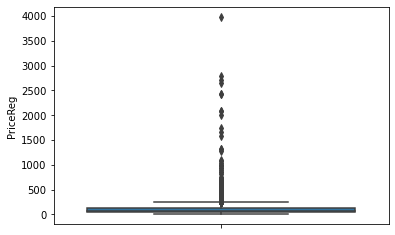

In [13]:
sns.boxplot(y="PriceReg", data=df_sub)

<AxesSubplot:xlabel='PriceReg', ylabel='Density'>

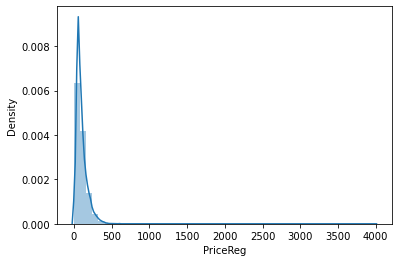

In [14]:
sns.distplot(df_sub["PriceReg"])

## 2. ABC Analysis

In [15]:
# create 3 classes A,B,C based on quantity percentages (A-60%,B-25%,C-15%)
def ABC_segmentation(RunPerc):
    if RunPerc > 0 and RunPerc < 0.6:
        return 'A'
    elif RunPerc >=0.6 and RunPerc < 0.85:
        return 'B'
    elif RunPerc >=0.85:
        return 'C'

In [16]:
# create the column of the additive cost per SKU
df_sub['AddCost'] = df_sub['PriceReg'] * df_sub['ItemCount']

In [17]:
# order by AddCost
df_sub = df_sub.sort_values(by=['AddCost'], ascending=False)

In [18]:
# create the column of the running CumCost of the cumulative cost per SKU
df_sub['RunCumCost'] = df_sub['AddCost'].cumsum()

In [19]:
# create the column of the total sum
df_sub['TotSum'] = df_sub['AddCost'].sum()

In [20]:
# create the column of the running percentage 
df_sub['RunPerc'] = df_sub['RunCumCost'] / df_sub['TotSum']

In [21]:
# create the column of the class
df_sub['Class'] = df_sub['RunPerc'].apply(ABC_segmentation)

In [22]:
df_sub

,SKU_number,PriceReg,ItemCount,File_Type,AddCost,RunCumCost,TotSum,RunPerc,Class
685,145889,244.6,851,Historical,208154.6,2.081546e+05,3.426320e+08,0.000608,A
601,435034,281.8,616,Historical,173588.8,3.817434e+05,3.426320e+08,0.001114,A
75056,538479,2645.3,49,Historical,129619.7,5.113631e+05,3.426320e+08,0.001492,A
5752,212633,235.6,521,Historical,122747.6,6.341107e+05,3.426320e+08,0.001851,A
3758,212480,208.8,579,Historical,120895.2,7.550059e+05,3.426320e+08,0.002204,A
...,...,...,...,...,...,...,...,...,...
4214,494166,0.0,7,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
57965,1758095,0.0,8,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
40803,744731,0.0,0,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C
40847,878815,0.0,29,Historical,0.0,3.426320e+08,3.426320e+08,1.000000,C


In [23]:
# total SKUs for each class
df_sub.Class.value_counts()

C    37413
B    22288
A    16295
Name: Class, dtype: int64

In [24]:
# total cost per class
print('Cost of Class A:', df_sub[df_sub.Class == 'A']['AddCost'].sum())
print('Cost of Class B:', df_sub[df_sub.Class == 'B']['AddCost'].sum())
print('Cost of Class C:', df_sub[df_sub.Class == 'C']['AddCost'].sum())

Cost of Class A: 205577451.4
Cost of Class B: 85658215.25999999
Cost of Class C: 51396361.129999995


In [25]:
# percent of total cost per class
print('Percent of Cost of A:',df_sub[df_sub.Class == 'A']['AddCost'].sum()/df_sub['AddCost'].sum())
print('Percent of Cost of B:',df_sub[df_sub.Class == 'B']['AddCost'].sum()/df_sub['AddCost'].sum())
print('Percent of Cost of C:',df_sub[df_sub.Class == 'C']['AddCost'].sum()/df_sub['AddCost'].sum())

Percent of Cost of A: 0.5999948479013728
Percent of Cost of B: 0.2500006079773141
Percent of Cost of C: 0.15000454412131298


## Summarize Results

![ABC_analysis.png](ABC_analysis.png)

Category A items represent 21% of an overall inventory by item and represent 60% of value of an inventory.\
Category B items represent 30% of inventory items by item, and about 25% of the value. \
Category C items represent 49% of actual items but only 15% of the inventory value.

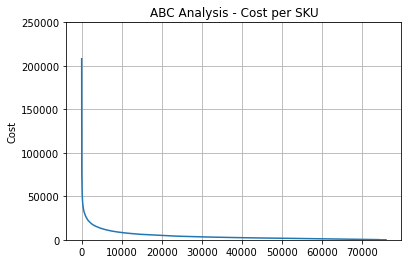

In [26]:
performance =df_sub['AddCost'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos, performance)
plt.ylabel('Cost')
plt.title('ABC Analysis - Cost per SKU')
plt.grid(True)
plt.ylim((0,250000))
plt.show()

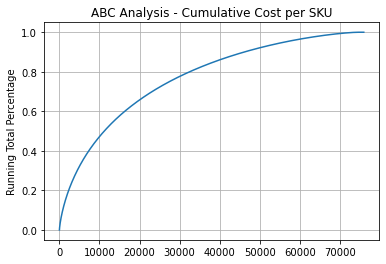

In [27]:
performance = df_sub['RunPerc'].tolist()
y_pos = np.arange(len(performance))

plt.plot(y_pos,performance)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Cost per SKU')
plt.grid(True)
plt.show()